<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU


## **Natural Gas** future

In [ ]:
futuro = 'NG=F'
ticker = yf.Ticker(futuro)
hist = ticker.history(start= '2012-01-01', end= '2024-01-01', interval='1mo')['Close']

hist

,Close
Date,
2012-02-01 00:00:00-05:00,2.616
2012-03-01 00:00:00-05:00,2.126
2012-05-01 00:00:00-04:00,2.422
2012-06-01 00:00:00-04:00,2.824
2012-08-01 00:00:00-04:00,2.799
...,...
2023-07-01 00:00:00-04:00,2.634
2023-08-01 00:00:00-04:00,2.768
2023-09-01 00:00:00-04:00,2.929


In [ ]:
# prompt: change index from format 'yyyy-mm-dd 00:00:00-00:00' to 'yyyy-mm-dd'

hist.index = hist.index.strftime('%Y-%m-%d')

In [ ]:
hist.index = pd.to_datetime(hist.index)

In [ ]:
hist

,Close
Date,
2012-02-01,2.616
2012-03-01,2.126
2012-05-01,2.422
2012-06-01,2.824
2012-08-01,2.799
...,...
2023-07-01,2.634
2023-08-01,2.768
2023-09-01,2.929


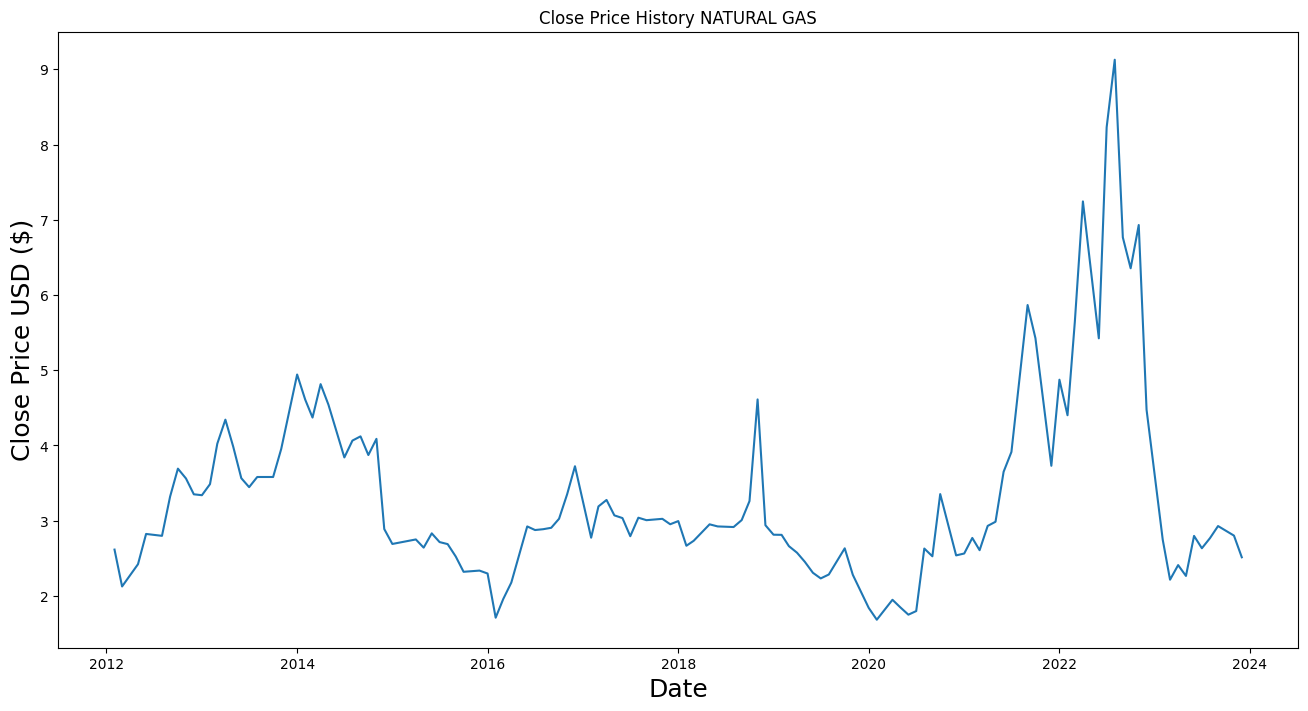

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History NATURAL GAS')
plt.plot(hist)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
piv_index = getattr(hist.index, 'year')
piv_season = getattr(hist.index, 'month')

piv = pd.pivot_table(hist, index=piv_index, columns=piv_season, values='Close')
piv.plot(figsize=(12,8))

KeyError: 'Close'

In [ ]:
hist.head(20)

,Close
Date,
2012-01-03 00:00:00-05:00,2.993
2012-01-04 00:00:00-05:00,3.096
2012-01-05 00:00:00-05:00,2.980
2012-01-06 00:00:00-05:00,3.062
2012-01-09 00:00:00-05:00,3.011
2012-01-10 00:00:00-05:00,2.941
2012-01-11 00:00:00-05:00,2.774
2012-01-12 00:00:00-05:00,2.697
2012-01-13 00:00:00-05:00,2.670


# **META** stock

In [5]:
stock = 'META'
ticker = yf.Ticker(stock)
hist2 = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

hist2

,Close
Date,
2013-01-01 00:00:00-05:00,30.916470
2013-02-01 00:00:00-05:00,27.194118
2013-03-01 00:00:00-05:00,25.527544
2013-04-01 00:00:00-04:00,27.713053
2013-05-01 00:00:00-04:00,24.300066
...,...
2023-08-01 00:00:00-04:00,295.283234
2023-09-01 00:00:00-04:00,299.594360
2023-10-01 00:00:00-04:00,300.652191


In [18]:
# prompt: change index from format 'yyyy-mm-dd 00:00:00-00:00' to 'yyyy-mm-dd'

hist2.index = hist2.index.strftime('%Y-%m-%d')


In [19]:
hist2.index = pd.to_datetime(hist2.index)

In [20]:
hist2

,Close
Date,
2013-01-01,30.916470
2013-02-01,27.194118
2013-03-01,25.527544
2013-04-01,27.713053
2013-05-01,24.300066
...,...
2023-08-01,295.283234
2023-09-01,299.594360
2023-10-01,300.652191


In [ ]:
hist2.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=132, freq=None)

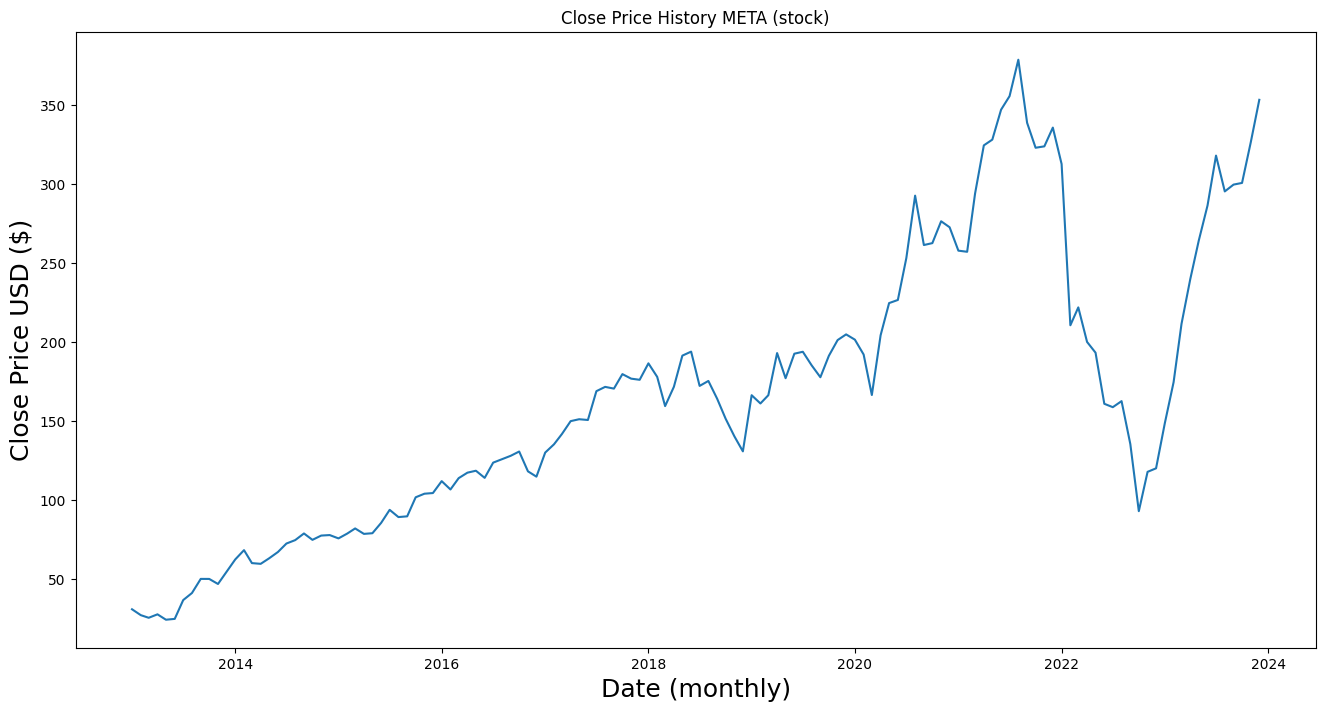

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History META (stock)')
plt.plot(hist2)
plt.xlabel('Date (monthly)', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

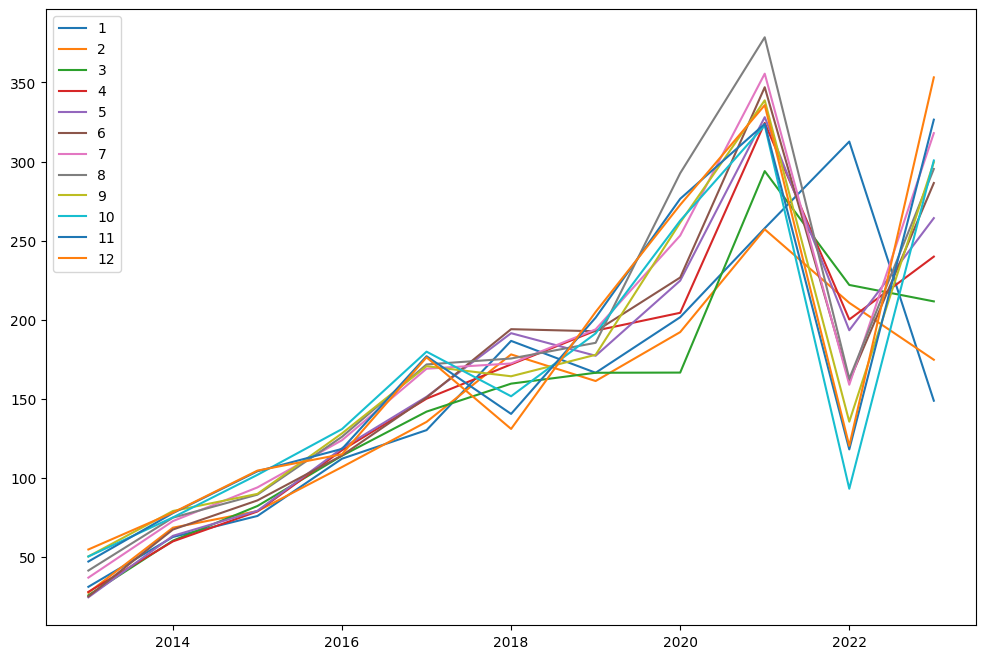

In [ ]:
piv_index = getattr(hist2.index, 'year')
piv_season = getattr(hist2.index, 'month')

piv = pd.DataFrame(index=pd.unique(piv_index), columns = pd.unique(piv_season), data = np.reshape(hist2.values, (11,12)))
piv.plot(figsize=(12,8))
plt.legend(pd.unique(piv_season))


Vemos como en el mes de octubre de 2022 el precio manifiesta una gran alza a coparación del resto de ese año, y en el 2021 se registra el maximo de precios.

In [ ]:
    piv = pd.pivot_table(hist2, index=piv_season, columns=piv_index, data=hist2)
    piv.plot(figsize=(12,8), legend = False)

TypeError: pivot_table() got multiple values for argument 'data'

In [ ]:
piv.head()

,1,2,3,4,5,6,7,8,9,10,11,12
2013,30.916468,27.194118,25.527544,27.713053,24.300064,24.828978,36.724529,41.205326,50.126991,50.107033,46.913597,54.537930
2014,62.441689,68.319611,60.116467,59.657406,63.170189,67.152008,72.501015,74.666565,78.877914,74.836220,77.540649,77.860001
2015,75.754333,78.808052,82.051392,78.608459,79.027611,85.594101,93.817215,89.246605,89.715637,101.760887,104.026230,104.445374
2016,111.979889,106.700737,113.866013,117.338882,118.566353,114.045647,123.685837,125.861366,128.006958,130.721375,118.177147,114.814072
2017,130.052765,135.262039,141.758698,149.941879,151.149414,150.670380,168.902908,171.617340,170.519592,179.690735,176.816650,176.098129


([], [])

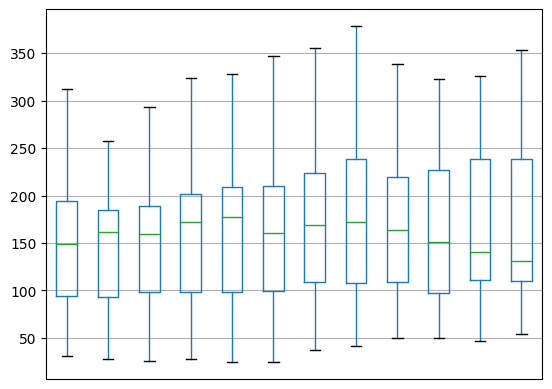

In [ ]:
piv.boxplot()
plt.xticks([])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

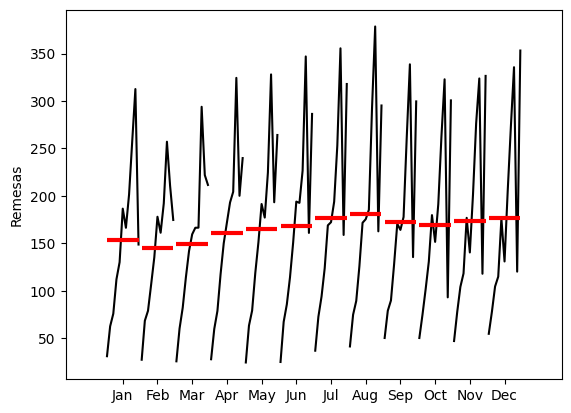

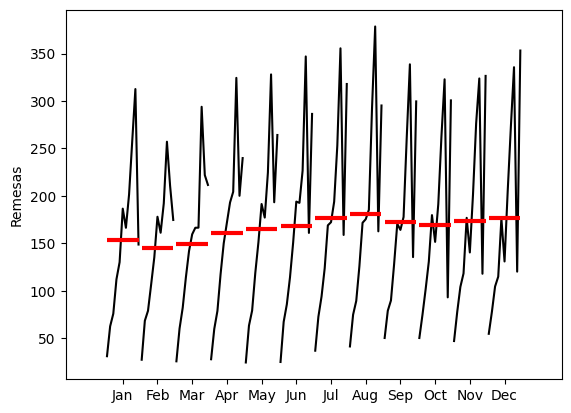

In [ ]:
month_plot(hist2, ylabel='Remesas')

In [ ]:
pd.plotting.scatter_matrix(hist2)

AttributeError: 'Series' object has no attribute 'columns'

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

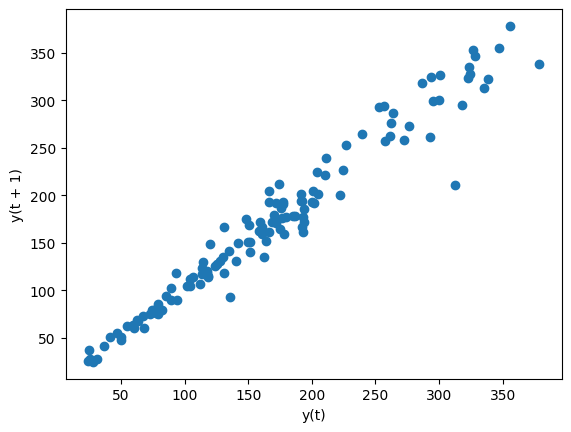

In [ ]:
from pandas.plotting import lag_plot
lag_plot(hist2, lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 2)'>

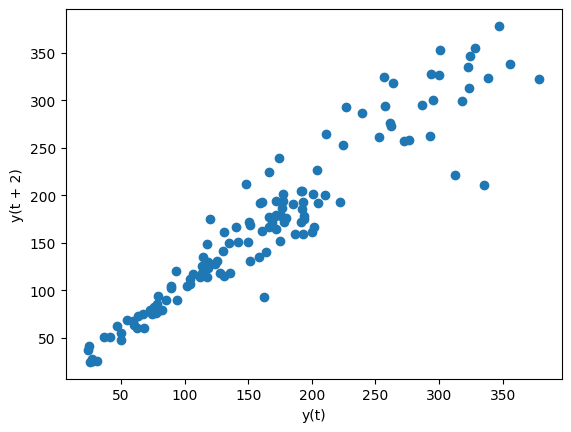

In [ ]:
lag_plot(hist2, lag=2)

<Axes: xlabel='y(t)', ylabel='y(t + 6)'>

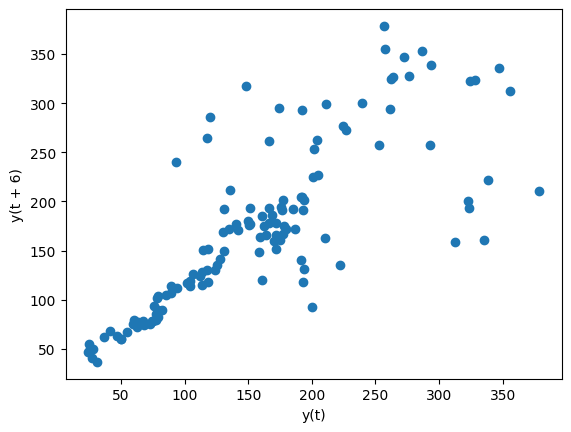

In [ ]:
lag_plot(hist2, lag=6)

<Axes: xlabel='y(t)', ylabel='y(t + 6)'>

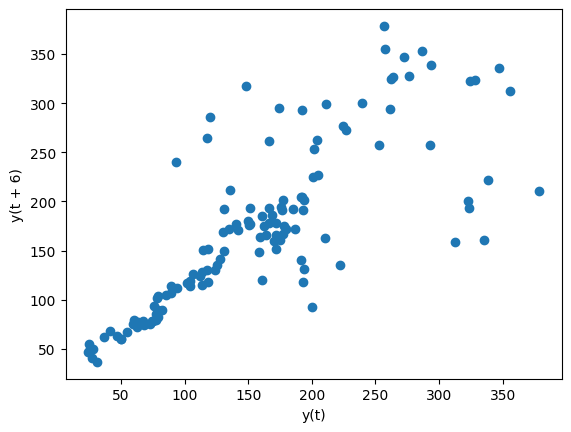

In [ ]:
lag_plot(hist2, lag=6)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

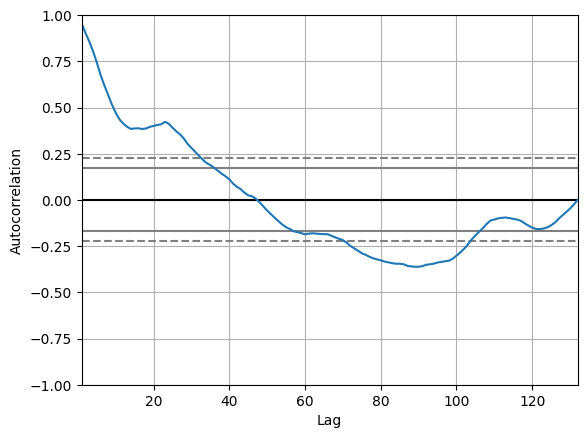

In [ ]:
pd.plotting.autocorrelation_plot(hist2)

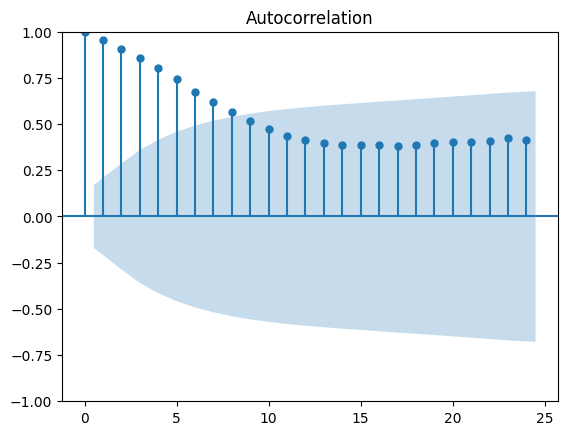

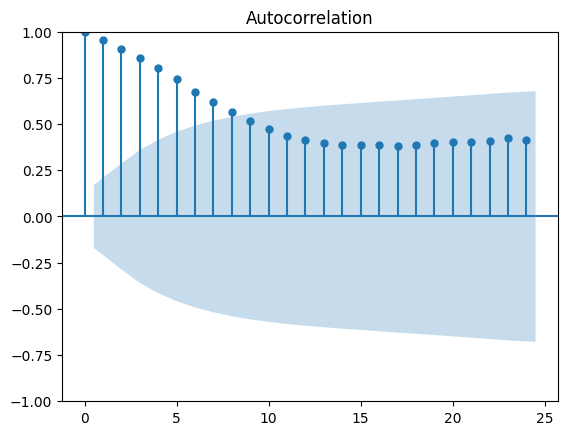

In [ ]:
plot_acf(hist2, lags=24)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(hist2, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Date
2013-01-01   NaN
2013-02-01   NaN
2013-03-01   NaN
2013-04-01   NaN
2013-05-01   NaN
              ..
2023-08-01   NaN
2023-09-01   NaN
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
Name: trend, Length: 132, dtype: float64
Date
2013-01-01    -0.630015
2013-02-01   -11.975698
2013-03-01    -8.585086
2013-04-01     1.470585
2013-05-01     4.434166
                ...    
2023-08-01    12.991036
2023-09-01     1.351084
2023-10-01    -3.932194
2023-11-01    -3.337577
2023-12-01    -4.558691
Name: seasonal, Length: 132, dtype: float64
Date
2013-01-01   NaN
2013-02-01   NaN
2013-03-01   NaN
2013-04-01   NaN
2013-05-01   NaN
              ..
2023-08-01   NaN
2023-09-01   NaN
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
Name: resid, Length: 132, dtype: float64
Date
2013-01-01     30.916468
2013-02-01     27.194118
2013-03-01     25.527544
2013-04-01     27.713053
2013-05-01     24.300064
                 ...    
2023-08-01    295.283234
2023-09-01    299.594360
2023-10-01    30

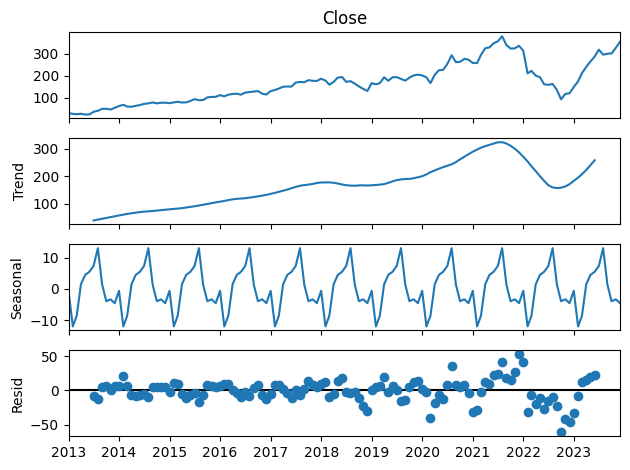

In [ ]:
from matplotlib import pyplot
result = seasonal_decompose(hist2, model='additive')
result.plot()
pyplot.show()

Los tres componentes se pueden observar de manera separada en estas gráficas, notamos como al pasar el tiempo el componente de estacionalidad cambia; como se observan los ciclos (patrones) muy similares. El residual es el lo que queda despues de substraer tanto la estacionalidad como los ciclos

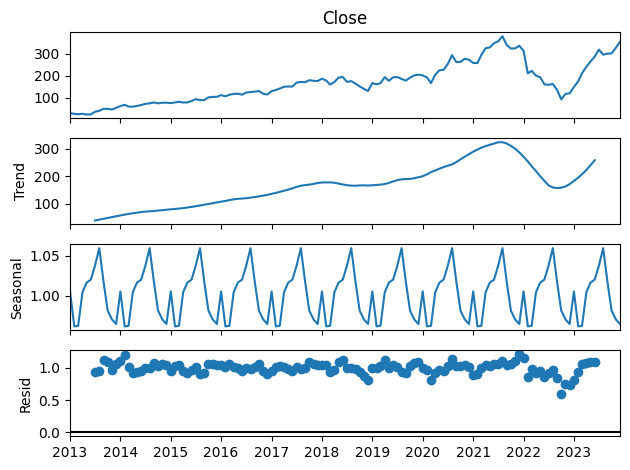

In [ ]:
result = seasonal_decompose(hist2, model='multiplicative')
result.plot()
pyplot.show()

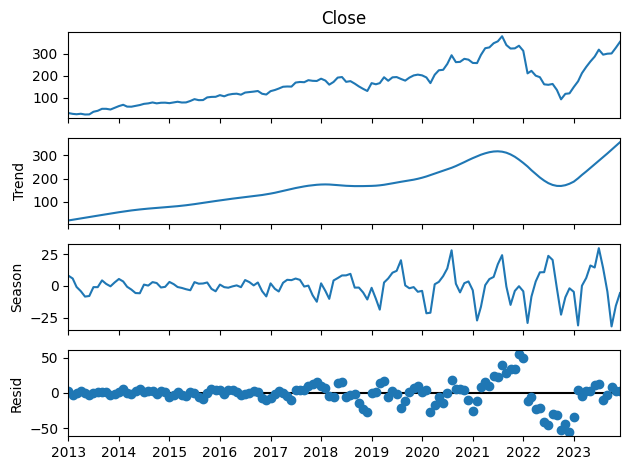

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(hist2)
res = stl.fit()
fig = res.plot()

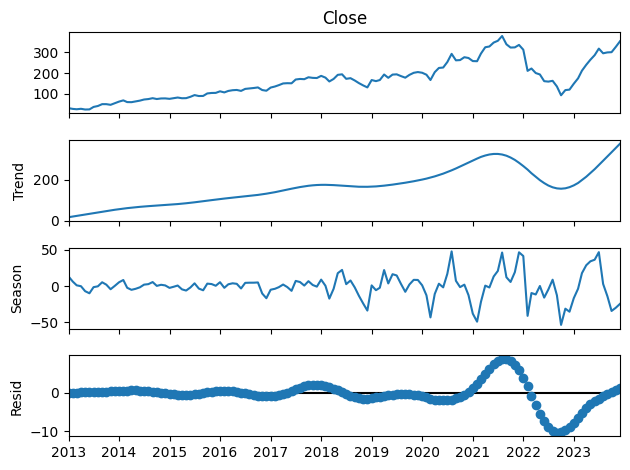

In [ ]:
stl = STL(hist2, seasonal=3, trend = 13)
res = stl.fit()
fig = res.plot()

Gráfica con MA (moving average) de orden 3, para obtener una media y estimar un ciclo de tendencia.

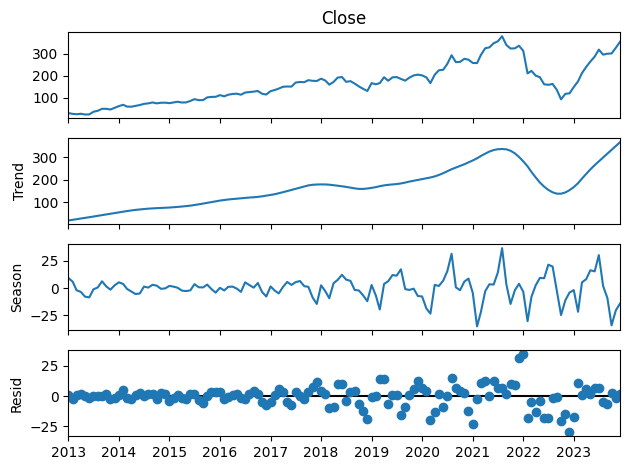

In [ ]:
stl = STL(hist2, seasonal=5, trend = 13)
res = stl.fit()
fig = res.plot()

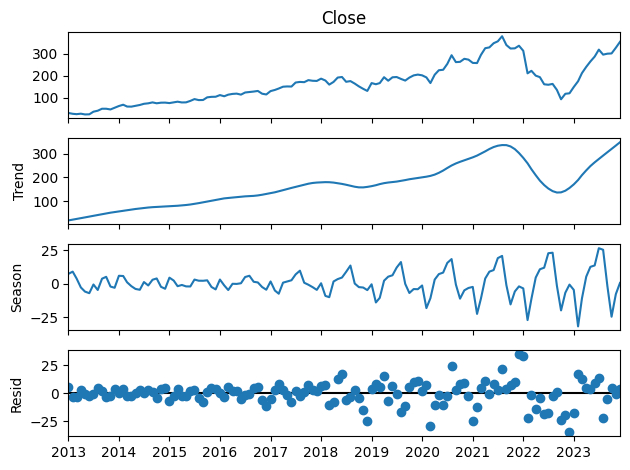

In [ ]:
stl = STL(hist2, seasonal=13, trend = 13)
res = stl.fit()
fig = res.plot()

Podemos observar que a lo largo de las tres graficas (3-MA, 5-MA, 13-MA), tanto tendencia como estacionalidad se parecen demasiado. Es el residual que se dispersa y cambia, y ya no es simétrica a comparación de la data real.

In [ ]:
hist2.describe()

,Close
count,132.000000
mean,165.873837
std,88.217962
min,24.300064
25%,93.605150
50%,161.857391
75%,206.271122
max,378.601990


In [ ]:
hist2.skew()

0.4822638525875052

In [ ]:
hist2.kurtosis()

-0.5353495254394343

<Axes: >

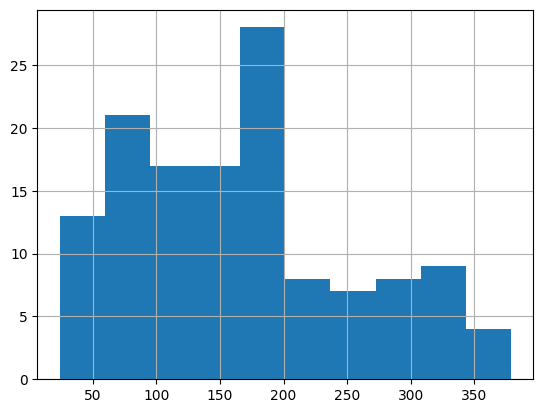

In [ ]:
hist2.hist()

## **PRONÓSTICOS**




In [22]:
import seaborn as sns
import datetime as dt

In [23]:
hist2.head()

,Close
Date,
2013-01-01,30.916470
2013-02-01,27.194118
2013-03-01,25.527544
2013-04-01,27.713053
2013-05-01,24.300066


In [7]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.2 MB/s eta 0:00:00


In [24]:
# HistoricAverage's usage example:
from statsforecast.models import HistoricAverage

# Create an array with the observed values in Bricks:
y_mean = hist2.values

# Define the model, fit and predict:
model = HistoricAverage()
model = model.fit(y=y_mean)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([165.87384, 165.87384, 165.87384], dtype=float32)}

In [25]:
pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01'], dtype='datetime64[ns]', freq=None)

In [26]:
# Specify the quarters predicted:
months_pred = pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

# Create a dataframe with the quarters and values predicted:
Y_pred_df = pd.DataFrame({'mean_forecast':y_hat_dict["mean"]}, index = months_pred)

In [27]:
Y_pred_df

,mean_forecast
2024-01-01,165.87384
2024-02-01,165.87384
2024-03-01,165.87384


In [28]:
pd.concat([hist2, Y_pred_df])

,0,mean_forecast
2013-01-01,30.916470,NaN
2013-02-01,27.194118,NaN
2013-03-01,25.527544,NaN
2013-04-01,27.713053,NaN
2013-05-01,24.300066,NaN
...,...,...
2023-11-01,326.479095,NaN
2023-12-01,353.234131,NaN
2024-01-01,NaN,165.87384
2024-02-01,NaN,165.87384


In [30]:
frame = pd.concat([hist2, Y_pred_df])
frame.columns = ['Values', 'mean_forecast']

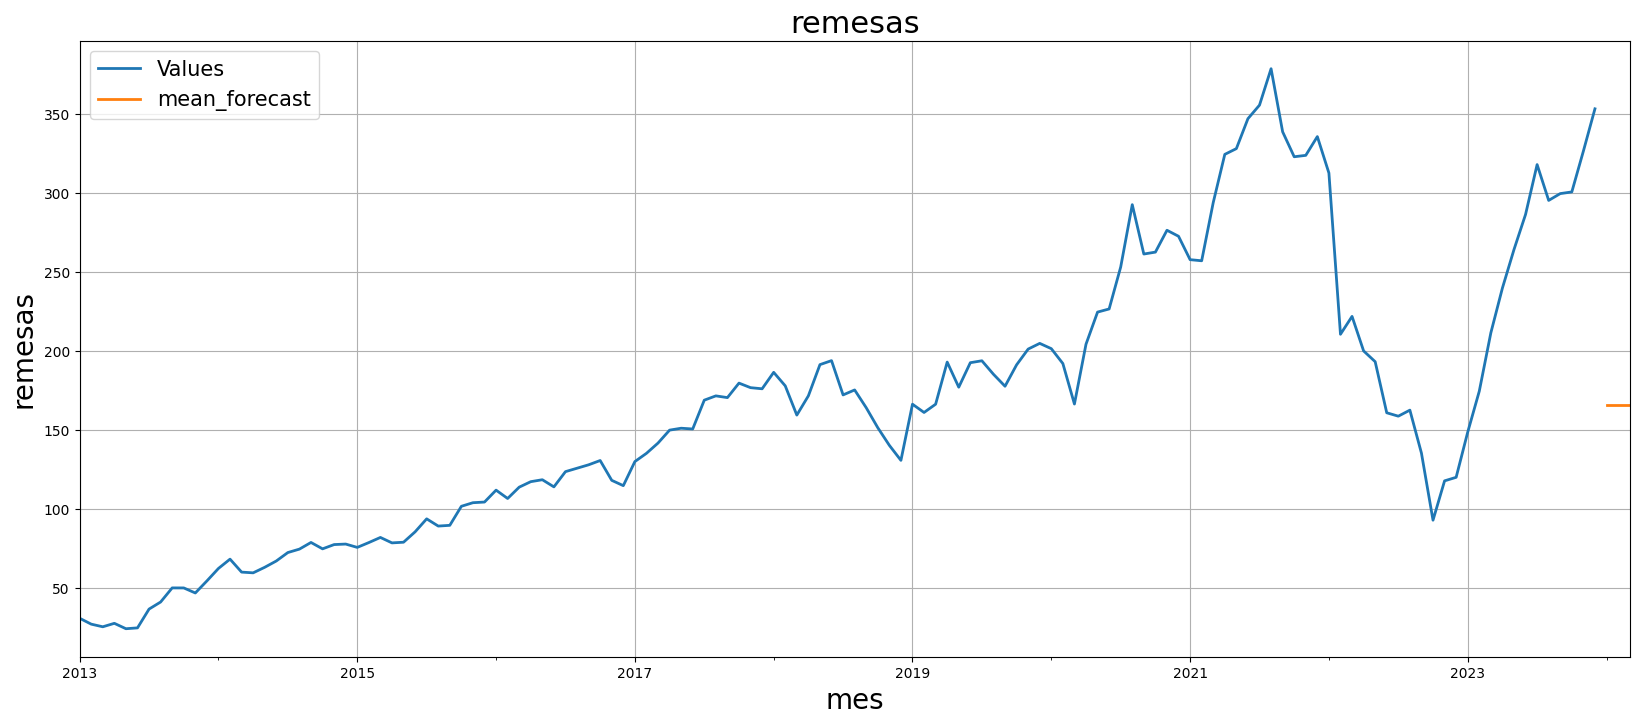

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([hist2, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast']
plot_df[['Values', 'mean_forecast']].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('remesas', fontsize=22)
ax.set_ylabel('remesas', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

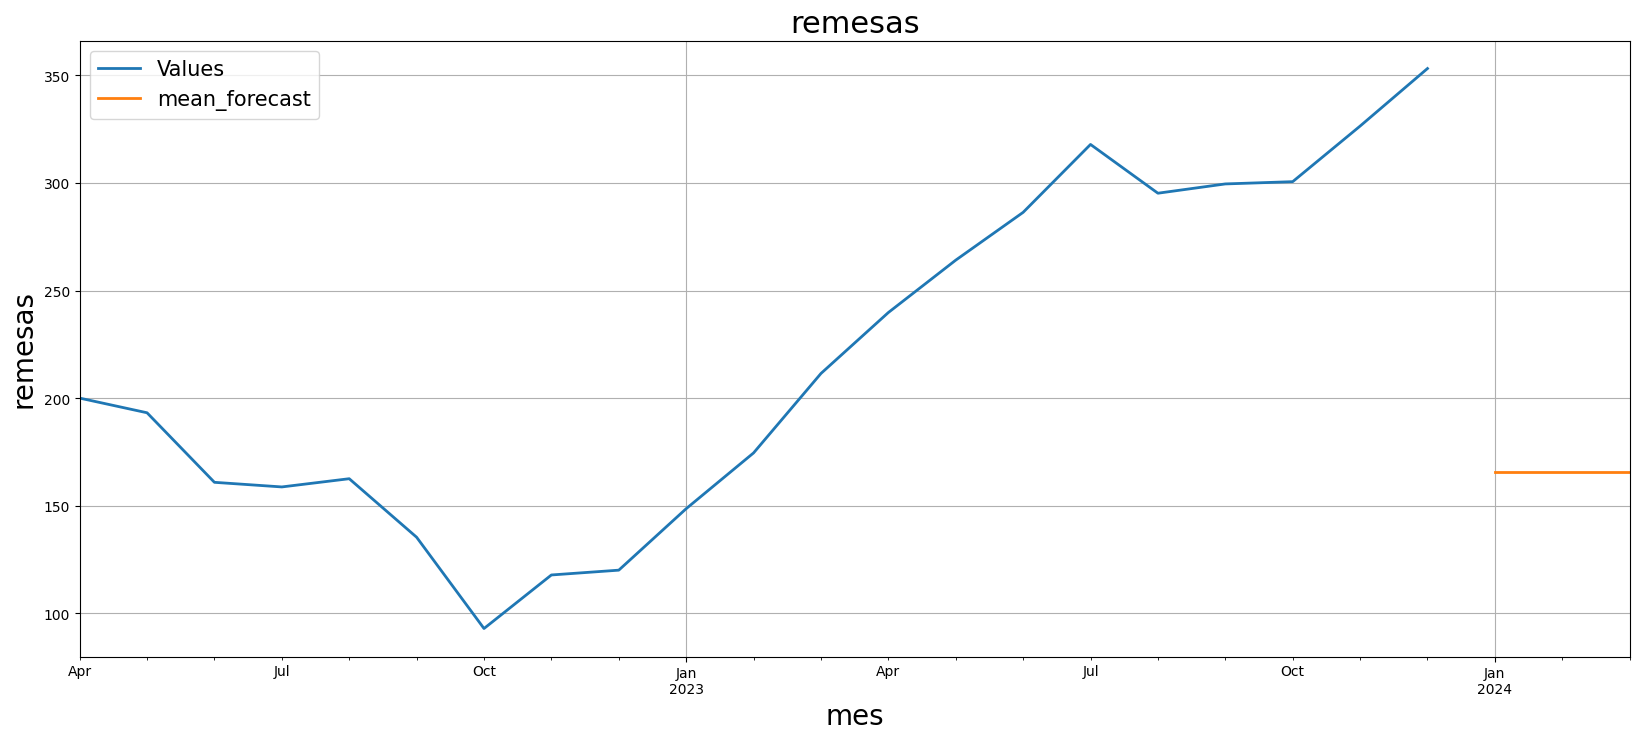

In [33]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([hist2, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('remesas', fontsize=22)
ax.set_ylabel('remesas', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

## **Naïve method**


For naïve forecasts, we simply set all forecasts to be the value of the last observation. That is,

\begin{gather*}
\hat{y}_{T+h|T}=y_{T}
\end{gather*}

This method works remarkably well for many economic and financial time series.



*Toma en cuenta solamente en último dato de la serie de tiempo sin ningún otro factor que afecta la serie de tiempo, es lineal.*

In [36]:
# Naive's usage example:
from statsforecast.models import Naive

# Define the model, fit and predict:
model = Naive()
model = model.fit(y=hist2.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([353.23413, 353.23413, 353.23413], dtype=float32)}

In [37]:
# Create a column with the values predicted:
Y_pred_df["naive_forecast"] = y_hat_dict["mean"]

In [38]:
Y_pred_df

,mean_forecast,naive_forecast
2024-01-01,165.87384,353.234131
2024-02-01,165.87384,353.234131
2024-03-01,165.87384,353.234131


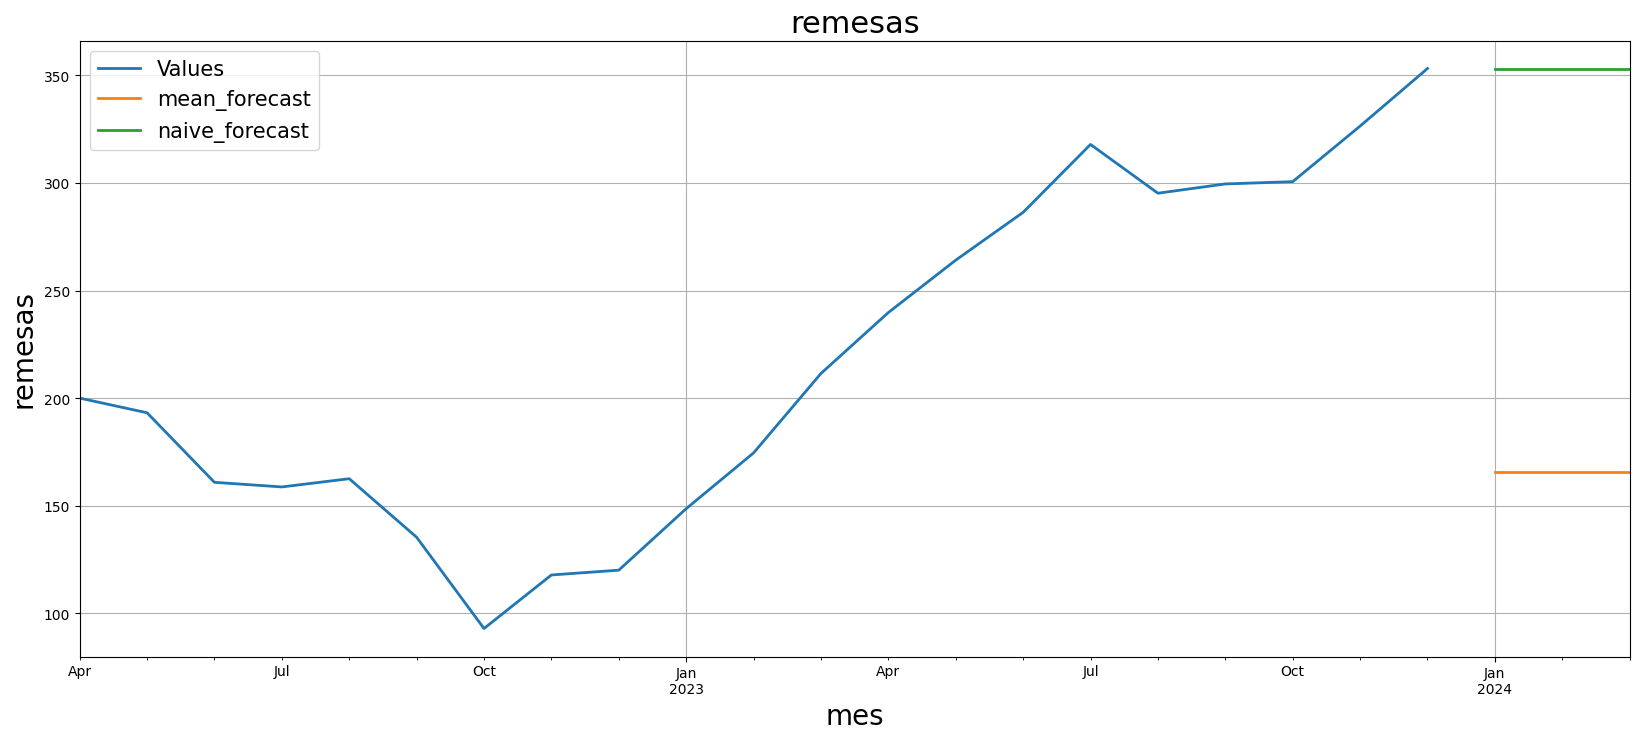

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([hist2, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('remesas', fontsize=22)
ax.set_ylabel('remesas', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

## **Seasonal naïve method**

A similar method is useful for highly seasonal data. In this case, we set each forecast to be equal to the last observed value from the same season (e.g., the same month of the previous year). Formally, the forecast for time  $T+h$ is written as

\begin{gather*}
\hat{y}_{T+h|T}=y_{T+h-m(k+1)}
\end{gather*}

where $m=$ the seasonal period, and $k$ is the integer part of  $(h−1)/m$ (i.e., the number of complete years in the forecast period prior to time $T+h)$. This looks more complicated than it really is.


Es un metodo más completo y a diferencia del solo naïve, este si toma en cuenta lo que es la estacionalidad.  

In [41]:
# SeasonalNaive's usage example:
from statsforecast.models import SeasonalNaive

# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=hist2.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([148.6645 , 174.58125, 211.50537], dtype=float32)}

In [42]:
# Create a column with the values predicted:
Y_pred_df["seasonal_naive_forecast"] = y_hat_dict["mean"]


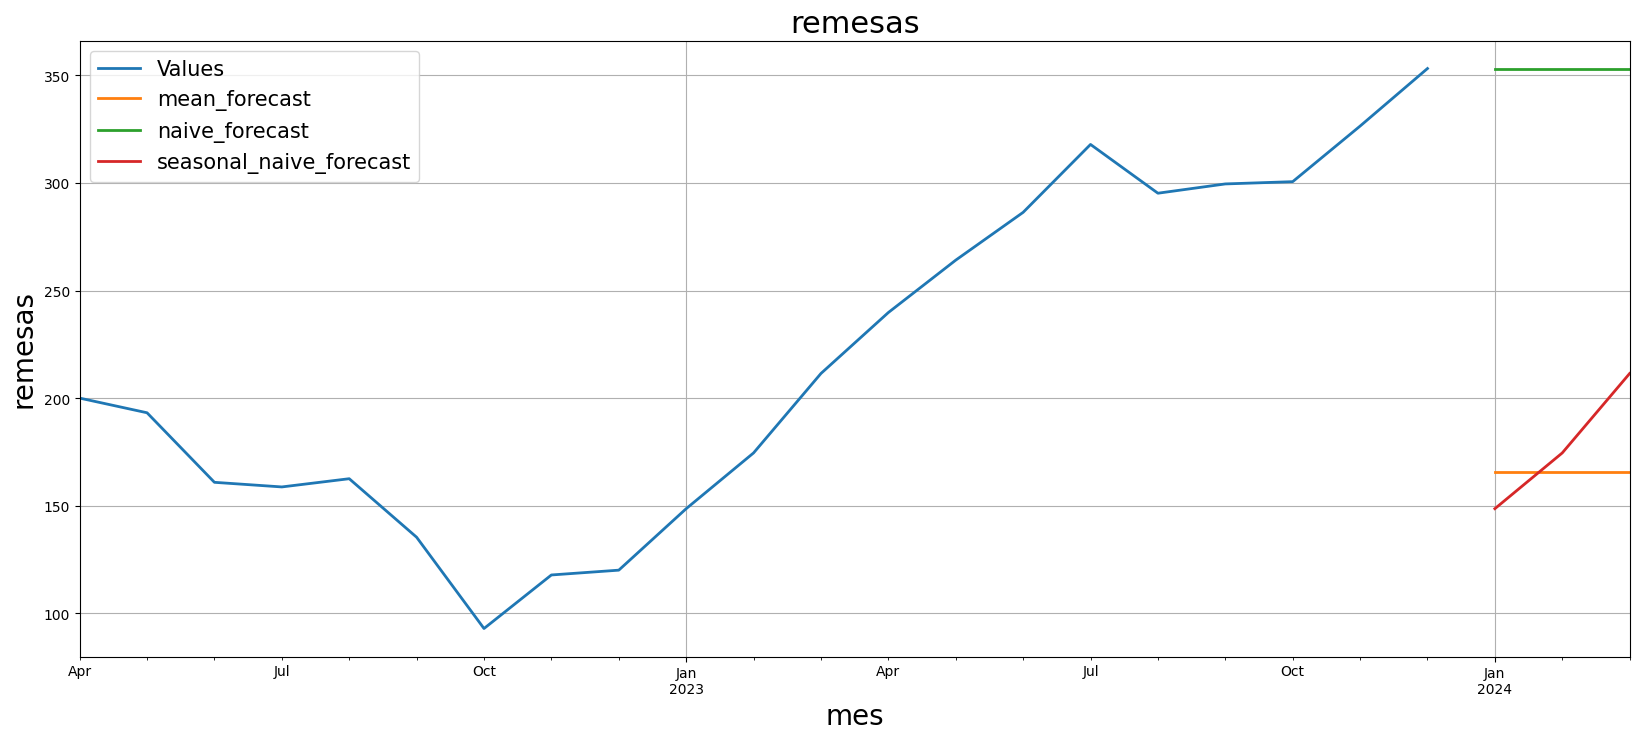

In [44]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([hist2, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('remesas', fontsize=22)
ax.set_ylabel('remesas', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

## **Drift method**

A variation on the naïve method is to allow the forecasts to increase or decrease over time, where the amount of change over time (called the drift) is set to be the average change seen in the historical data. Thus the forecast for time $T+h$ is given by

\begin{gather*}
\hat{y}_{T+h|T}=y_{T}+\frac{h}{T-1}\sum_{t=2}^{T}(y_{t}-y_{t-1})=y_{T}+h\frac{y_{T}-y_{1}}{T-1}
\end{gather*}

This is equivalent to drawing a line between the first and last observations, and extrapolating it into the future.


Este metodo toma en cuenta la tendencia (pendiente) de nuestra serie de tiempo según lo que es los datos ya sean anuales o mensuales

In [45]:
# RandomWalkWithDrift's usage example:
from statsforecast.models import RandomWalkWithDrift

# Define the model, fit and predict:
model = RandomWalkWithDrift()
model = model.fit(y=hist2.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([355.69458, 358.155  , 360.61545], dtype=float32)}

In [46]:
# Create a column with the values predicted:
Y_pred_df["drift_forecast"] = y_hat_dict["mean"]

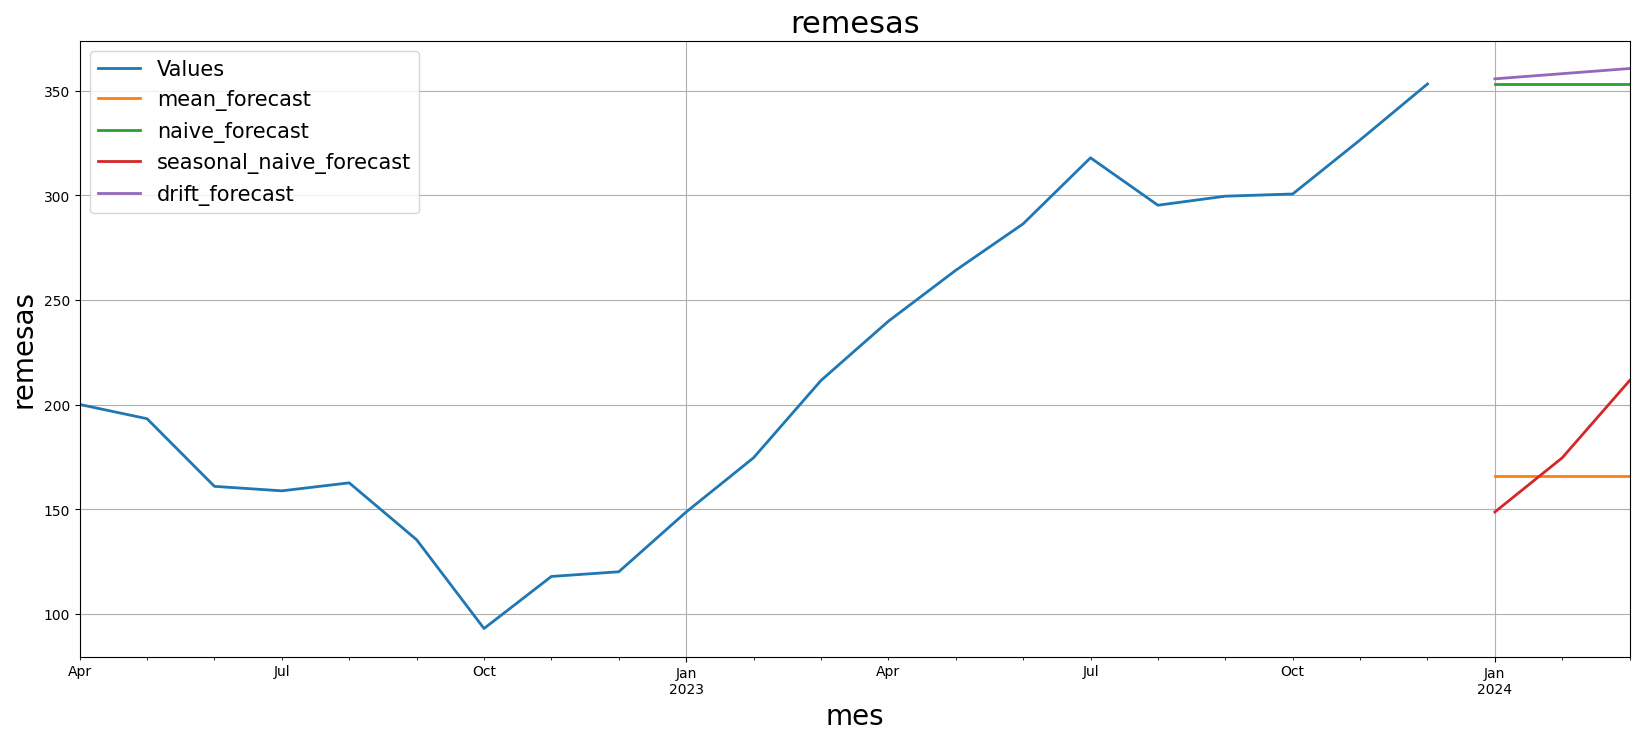

In [48]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([hist2, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast', 'drift_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('remesas', fontsize=22)
ax.set_ylabel('remesas', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

## **Valores ajustados y residuales**

The **residuals** in a time series model are what is left over after fitting a model. The residuals are equal to the difference between the observations and the corresponding fitted values:

\begin{gather*}
e_{t}=y_{t}-\hat{y}_{t*}
\end{gather*}

The fitted values and residuals from a model can be obtained using the augment() function.

In [54]:
#Import the libraries that we are going to use for the analysis:
import pandas as pd
import numpy as np

from statsforecast import StatsForecast
from statsforecast.models import __all__
from statsforecast.models import HistoricAverage

In [55]:
# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=hist2.values)
mean = model.predict(h=12)

In [57]:
def augment(model_name, time_var, obs_values):

    type_model_list = []
    for n in range(len(obs_values)):
        type_model_list.append(model_name)
        n += 1
    fitted_values = model.predict_in_sample()
    residuals = obs_values - fitted_values["fitted"]

    augment_df = pd.DataFrame({'model':type_model_list,
                        'time_var':time_var,
                        'obs_values':obs_values,
                        'fitted_values':fitted_values["fitted"],
                        'residuals':residuals})

    return(augment_df)

In [60]:
# augment(model_name, time_var, obs_values)
augment_df = augment("Mean",hist2.index,hist2)

In [61]:
augment_df

,model,time_var,obs_values,fitted_values,residuals
Date,,,,,
2013-01-01,Mean,2013-01-01,30.916470,NaN,NaN
2013-02-01,Mean,2013-02-01,27.194118,NaN,NaN
2013-03-01,Mean,2013-03-01,25.527544,NaN,NaN
2013-04-01,Mean,2013-04-01,27.713053,NaN,NaN
2013-05-01,Mean,2013-05-01,24.300066,NaN,NaN
...,...,...,...,...,...
2023-08-01,Mean,2023-08-01,295.283234,162.595871,132.687363
2023-09-01,Mean,2023-09-01,299.594360,135.401764,164.192596
2023-10-01,Mean,2023-10-01,300.652191,92.968956,207.683235


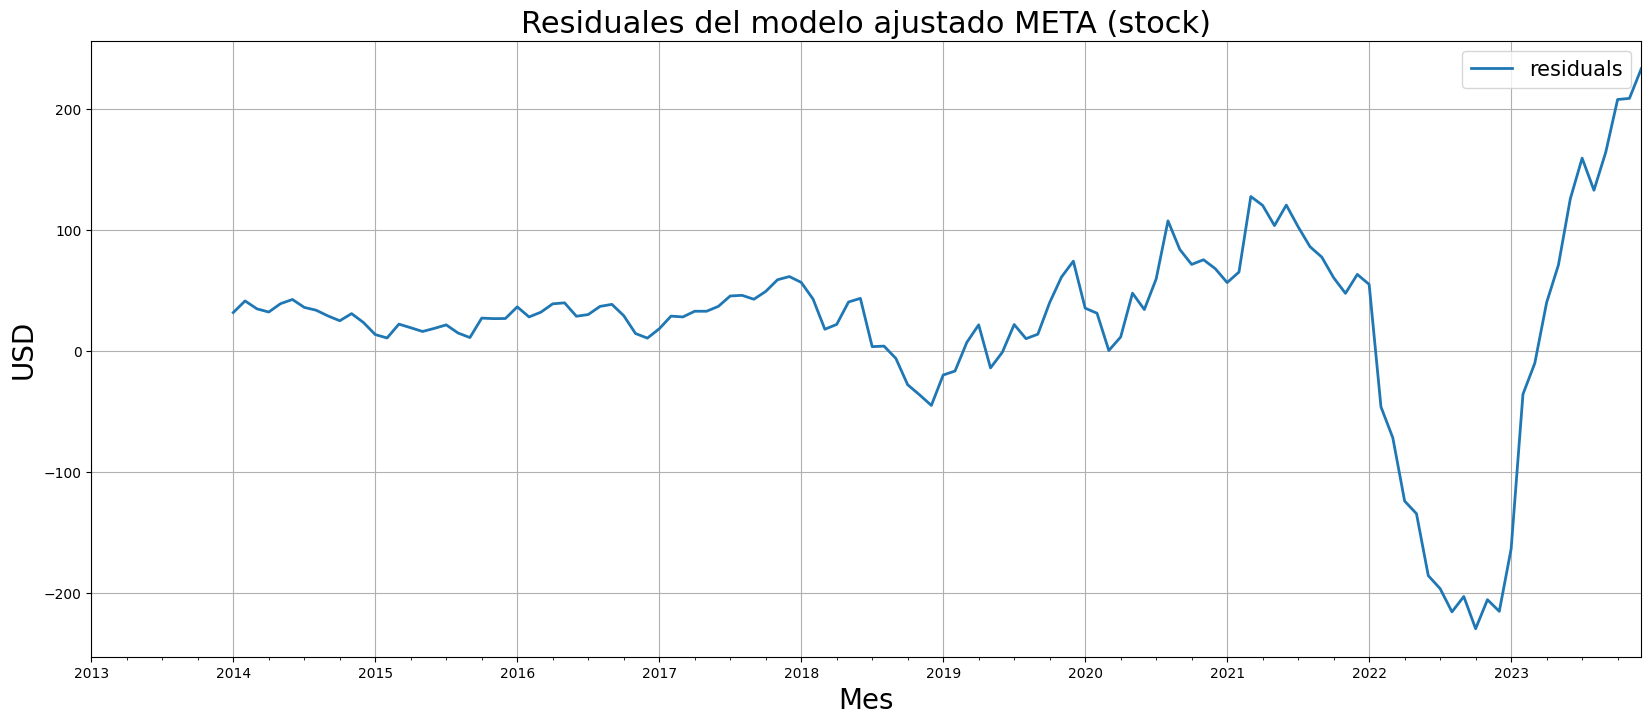

In [66]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
augment_df['residuals'].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ajustado META (stock)', fontsize=22)
ax.set_ylabel('USD', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

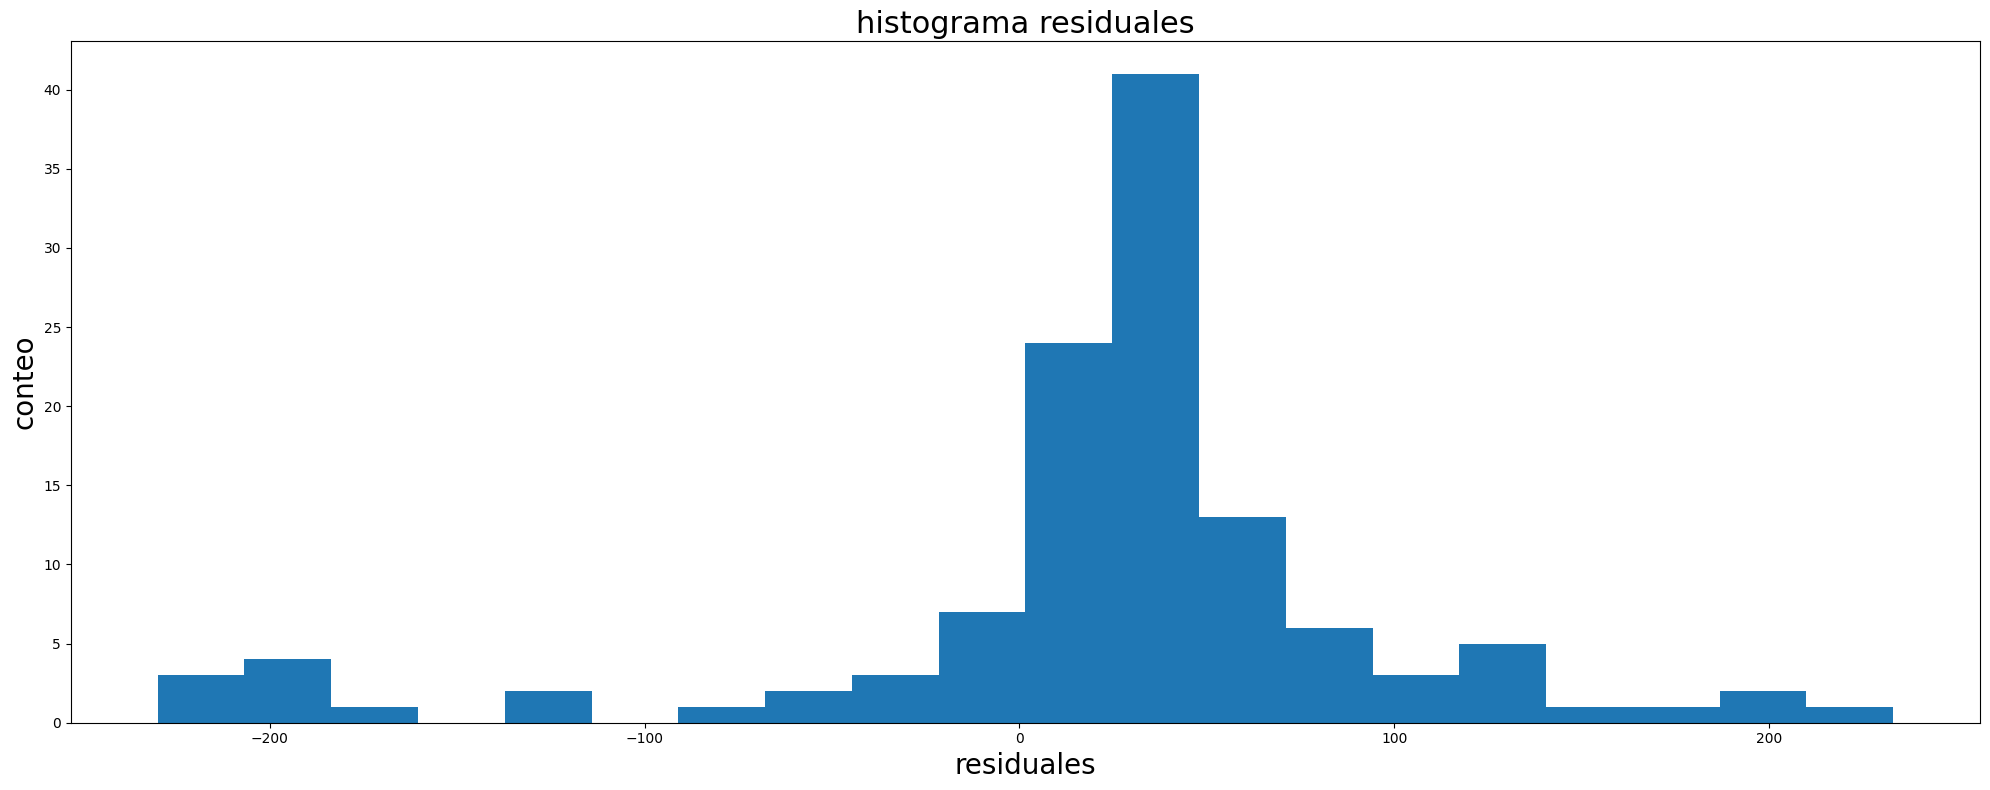

In [67]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(augment_df["residuals"], bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Text(0, 0.5, 'ACF')

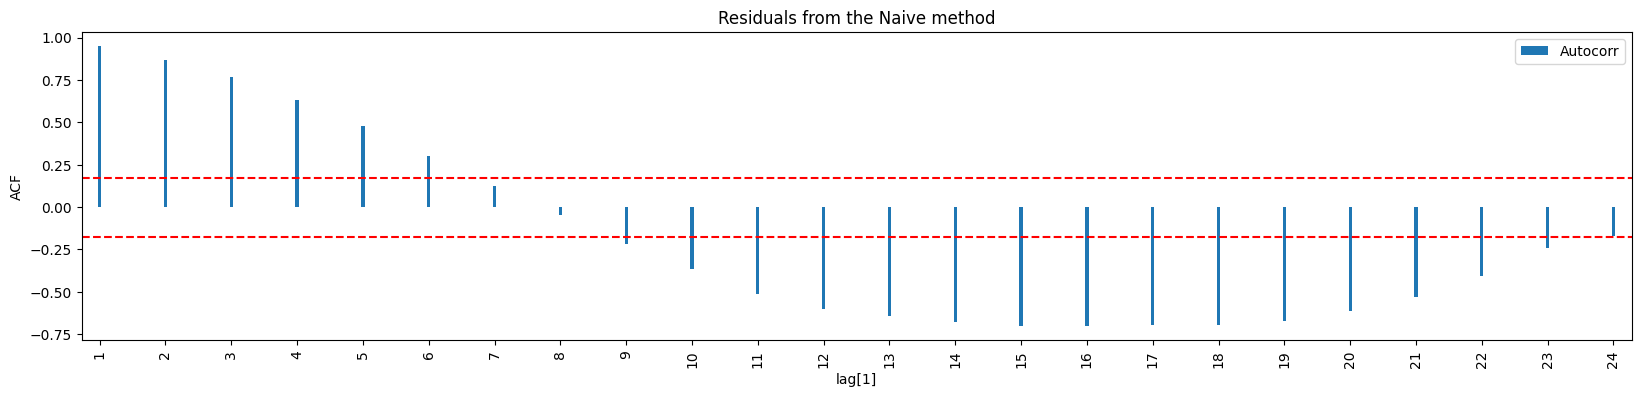

In [68]:
import math

ticker_data = augment_df["residuals"]
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(augment_df['residuals'])
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

In [69]:
import statsmodels

In [70]:
ljung_box = statsmodels.stats.diagnostic.acorr_ljungbox(test_df, lags=12, model_df=0)
ljung_box.tail(1)

,lb_stat,lb_pvalue
12,77.510165,1.228990e-11


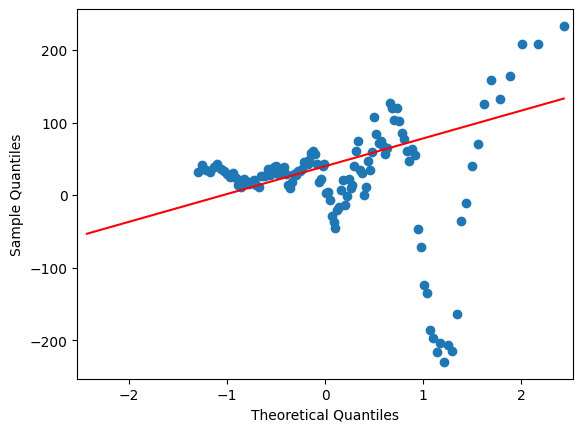

In [71]:
fig = statsmodels.api.qqplot(augment_df[['residuals']].values, line='q')
plt.show()

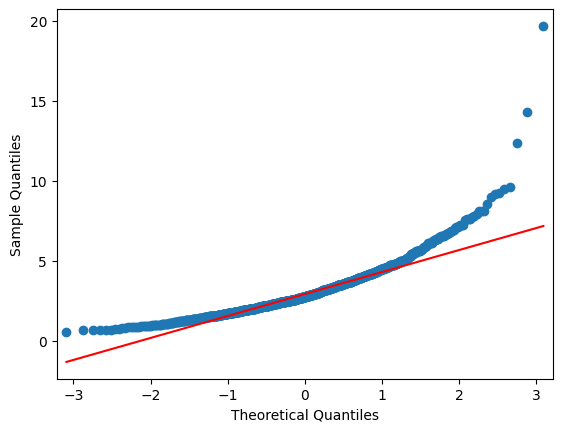

In [72]:
from scipy.stats import lognorm
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = statsmodels.api.qqplot(lognorm_dataset, line='q')

plt.show()

# **Definición del problema**


Definir cuidadosamente el problema exige comprender cómo se utilizarán los pronósticos, quién las necesita y cómo encaja la función de pronósticos en la organización que las necesita.

Para la serie de tiempo que utilizarás en clase, investiga el contexto histórico y social. Investiga los periodos atípicos, la tendencia, qué le afecta (variable exógena) o a qué afecta (variable endógena). Utiliza investigaciones pasadas y periódicos, noticias. Por que es importante pronosticar y para quien.


---
***Contexto histórico y social***

Anteriormente Facebook, fundada en 2004 por Mark Zuckerberg y sus compañeros de Harvard. Inicialmente, era una red social para estudiantes universitarios. Para cambiar la forma en la que la gente conectaba, expandiendose de manera global logro convertirse en una plataforma dominante de redes sociales y diversificó su negocio mediante adquisiciones, como la compra de Instagram en 2012 y WhatsApp en 2014. Salió a la bolsa (IPO) en mayo de 2012 con un precio por accion de $38usd.
A apartir de octubre de 2021 la empresa combio de nombre y es lo que hoy en día conocemos como META, haciendo referencia al metaverso. META ha alcanzado un reconocimiento y prestigio mundial brindando herramientas a miles de millones de personas como lo es la realidad aumentada, la realidad virtual y la realidad mixta para impulsar la próxima evolución de la tecnología social.

Jaramillo, D. (2012, 2 febrero). El icónico IPO de facebook y cómo otras importantes empresas llegaron a la bolsa. Maestros del Web. https://www.maestrosdelweb.com/ipo-facebook/

Our Mission. (s. f.). Meta. de https://about.meta.com/company-info/

---
***Periodos Atípicos***


A lo largo del tiempo Facebook / META a sufrido escándalos y contraversias las cuáles han dado un golpe tanto a sus accionarios como usuarios. Como lo fue en su momento el caso de Cambridge Analytics en 2018, y la gente se empezó a preocupar por sus datos e información debido al mal uso de data como las regulaciones de privacidad. Que al paso del tiempo sigue siendo de sus mismas problematicas, enfrentado múltiples investigaciones y demandas relacionadas con la privacidad, el contenido y la competencia.

De la misma manera que el resto del mundo, sufrió un impacto en lo que fue la pandemia debido al COVID-19; como un aumento en el uso de redes sociales y plataformas digitales, lo que inicialmente impulsó el precio de las acciones, aunque también trajo desafíos regulatorios y de seguridad.



Cambridge Analytica and Facebook: The Scandal and the Fallout So Far. (2018). The New York TImes. https://www.nytimes.com/2018/04/04/us/politics/cambridge-analytica-scandal-fallout.html


---
***Tendencia***

1. Crecimiento Continuo

Aumento de Usuarios y Beneficios: META ha experimentado un crecimiento en usuarios y beneficios a lo largo de los años, impulsado por la expansión en mercados internacionales y la diversificación en servicios y productos digitales.
2. Adaptación y Diversificación

Metaverso: Con el cambio de nombre a META, la empresa ha mostrado un enfoque en el desarrollo del metaverso, una tendencia a largo plazo que podría influir en el comportamiento de las acciones.


---
***Variables Endógenas ***


1. Rendimiento Financiero

Ingresos y Beneficios: Las ganancias y los ingresos de META, reportados trimestralmente, son una variable clave que afecta el precio de las acciones.
Estrategias de Expansión: Las decisiones estratégicas de META, como adquisiciones y lanzamientos de nuevos productos, también influyen en el valor de sus acciones.
2. Percepción del Mercado

Sentimiento de los Inversores: La percepción de los inversores sobre la capacidad de META para innovar y mantenerse competitiva en el mercado puede influir en el precio de las acciones.

---
***Importancia de la pronosticación***

1. *Para Inversores*

Toma de Decisiones: La pronosticación ayuda a los inversores a tomar decisiones informadas sobre comprar, vender o mantener acciones basadas en expectativas futuras.
2. *Para la Empresa*

Planificación Estratégica: La pronosticación de precios de acciones y de tendencias del mercado permite a META planificar su estrategia de negocios y tomar decisiones sobre inversiones y crecimiento.
3. *Para Analistas y Economistas**

Evaluación del Mercado: Los analistas utilizan pronósticos para evaluar el desempeño de META en el contexto del mercado en general y para realizar recomendaciones de inversión.

# **Variables exógenas**


*   ¿Por qué estas variables afectan tu variable objetivo?
*   ¿De dónde sacas tus datos?
*  ¿Los datos empalman en rango de tiempo y periodicidad (diarios/mes)?



Existen diferentes tipos de factores fuera de las series de tiempo que afectan e influyen en el comportamiento de estas, especificamente hablando de el precio stock de META. Así mismo son importantes para una comprensión completa del contexto en el que se mueve el precio de la acción.


- **Indicadores macroeconómicos:** PIB, tasas de interés, inflación y más cosas como estas tienen repercusión en el mercado de valores.

- **Condiciones del mercado:** la volatilidad y tendencia del mercado, cambios en el índice al que pertenecen (S&P 500) influyen en lo que es el precio de las acciones.

- **Resultados y datos de la misma empresa:** los cierres trimestrales, las ganancias o pérdidas que sufrió la empresa, cualquier noticia relevante a la empresa así como un cambio de administración.

- **Innovación y competencias:** debido al giro de la empresa cualquier avance tecnológico o desarollos en el sector tanto de tecnología como de redes sociales de los competidores de la empresa tambíen son factores importantes.

# **FUENTES**
 (¿De dónde sacas tus datos?)


Bloomberg - Are you a robot? (s. f.). https://www.bloomberg.com/

TechCrunch. (s. f.). TechCrunch | Startup and Technology News. https://techcrunch.com/

World Bank Open Data. (s. f.). World Bank Open Data. https://data.worldbank.org/

Yahoo is part of the Yahoo family of brands. (s. f.). https://finance.yahoo.com/
